# Assignment 6
## Gal Dali

### Question 1

#### Part A

$ \dot y = \alpha y^2 - \beta y^3 $

#### Explicit Euler: $ y_{i+1} = y_i + h f(t_i, y_i) $

$ y_{i+1} = y_i + h (\alpha y_i^2 - \beta y_i^3) $  


#### Semi-Implicit Euler: $ y_{i+1} = y_i + h \cdot B_i^{-1} \cdot f_i $

$ f_i = f(t_i, y_i) = \alpha y_i^2 - \beta y_i^3 $  
$ B_i = 1 - \frac{\partial f}{\partial y} = 1 - (\alpha \cdot 2y_i - \beta \cdot 3y_i^2) $  
$ B_i^{-1} = \frac{1}{1 - (\alpha \cdot 2y_i - \beta \cdot 3y_i^2)} = \frac{1}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2} $  
$ y_{i+1} = y_i + h \cdot \frac{1}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2} \cdot (\alpha y_i^2 - \beta y_i^3) = y_i + h \cdot \frac{\alpha y_i^2 - \beta y_i^3}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2} = y_i \cdot (\frac{1 - 2 \cdot h \cdot \alpha \cdot y + 3 \cdot h \cdot \beta \cdot y^2 - h \cdot \alpha \cdot y^2 + h \cdot \beta \cdot y^3}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2}) = y_i \cdot (\frac{1 + h \cdot \beta \cdot y^3 + y^2 \cdot (h \cdot (3 \beta - \alpha)) - 2h \alpha y}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2}) $

#### Part B

In [167]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

$ \alpha = \beta = 1, y(0) = 0.99, h = 3 $

In [168]:
alpha = beta = 1
y0 = 0.99
h = 3
num_of_iterations = 24  # question asked for 3 steps, but I will show 24 steps

[0.99, 1.0194029999999998, 0.9589132272307088, 1.0722528867245873, 0.8230397645383711, 1.1826554107851357, 0.41622938698428524, 0.7196387385671981, 1.1552191364856355, 0.5337847702334599, 0.9322955449642665, 1.1088366006609327, 0.7073867237665297, 1.1466542424644757, 0.568184230306978, 0.9863977854243917, 1.026101857758123, 0.9436550924796809, 1.094177966169187, 0.7559212003980147, 1.1743334250682886, 0.45308519208388365, 0.7899073657084159, 1.1831715614527203]
[0.99, 0.9975763353861218, 0.9994407976633206, 0.999872587014017, 0.9999710542663915, 0.9999934285027194, 0.9999985083122314, 0.9999996614081511, 0.999999923145083, 0.9999999825551981, 0.9999999960403185, 0.999999999101218, 0.9999999997959914, 0.9999999999536935, 0.9999999999894892, 0.9999999999976142, 0.9999999999994584, 0.9999999999998771, 0.9999999999999721, 0.9999999999999937, 0.9999999999999986, 0.9999999999999997, 0.9999999999999999, 1.0]

We can see that the Explicit-Euler solution does not converges to 1 (at least not af

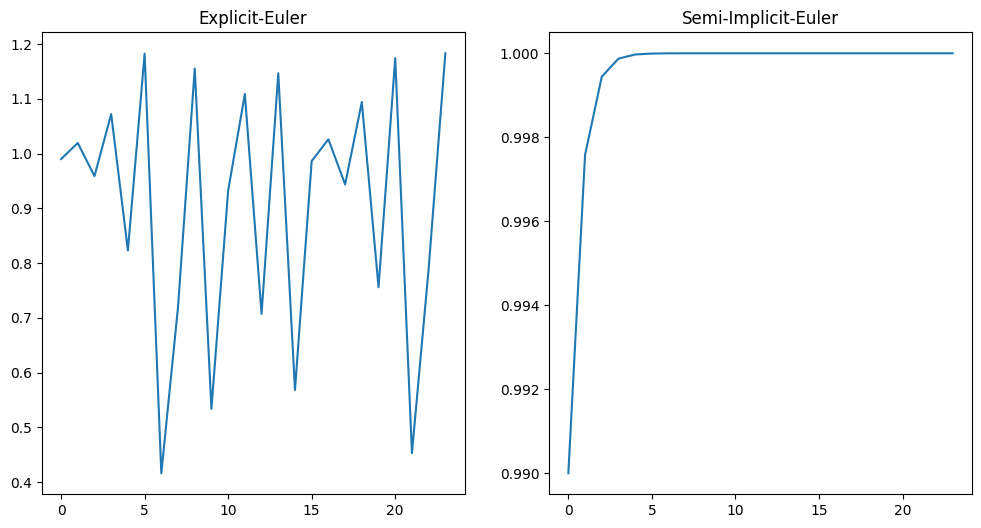

In [169]:
def explicit_euler_q1(f, delta, y_0, num_of_steps):
    y = [y_0]
    for i in range(1, num_of_steps):
        y.append(y[i - 1] + delta * f(y[i - 1]))
    return y


def semi_implicit_euler_q1(f, b, delta, y_0, num_of_steps):
    y = [y_0]
    for i in range(1, num_of_steps):
        y.append(y[i - 1] + delta * (1 / b) * f(y[i - 1]))
    return y


def flame_equation_derivative(area_const, volume_const):
    return lambda y: area_const * y ** 2 - volume_const * y ** 3


sol_explicit_euler_q1 = explicit_euler_q1(flame_equation_derivative(alpha, beta), h, y0, num_of_iterations)

b_term = 1 - h * (2 * alpha * y0 - 3 * beta * y0 ** 2)
sol_semi_implicit_euler_q1= (
    semi_implicit_euler_q1(flame_equation_derivative(alpha, beta), b_term, h, y0, num_of_iterations))

print(sol_explicit_euler_q1)
print(sol_semi_implicit_euler_q1)

print(
    "\nWe can see that the Explicit-Euler solution does not converges to 1 (at least not after a reasonable number of steps) while the Semi-Implicit-Euler solution converges to 1 after only 24 iterations.")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(sol_explicit_euler_q1)
ax1.set_title("Explicit-Euler")

ax2.plot(sol_semi_implicit_euler_q1)
ax2.set_title("Semi-Implicit-Euler")

plt.show()

### Question 2

$ (R_1 + R_2)\dot I_1 - R_2 \dot I_2 + \frac{I_1}{C_1} = 1 $  
$ -R_2 \dot I_1 + R_2 \dot I_2 + \frac{I_2}{C_2} = 0 $  

$\begin{pmatrix} I_1(0) = 0 \\ I_2(0) = 0 \\ \end{pmatrix}$  

$ R_1 = 100, R_2 = 1000, C_1 = C_2 = 10^{-5} = C $ (in some units)  

$ t \in [0, 0.05] $

#### Part A  

$$
\begin{pmatrix}
    \dot I_1 \\
    \dot I_2 \\
\end{pmatrix}
=
A \begin{pmatrix}
    I_1 \\
    I_2 \\
\end{pmatrix} +
\begin{pmatrix}
    b_1 \\
    b_2 \\
\end{pmatrix}
$$  

$ \text{Adding the two equations together simplifies a lot: } $  
$ R_1 \dot I_1 + \frac{I_1}{C_1} + \frac{I_2}{C_2} = 1 $  
$ \dot I_1 = - \frac{I_1}{C_1R_1} - \frac{I_2}{C_2R_1} + \frac{1}{R_1} $  
$ \text{So the first line of A is: } \frac{-1}{C_1R_1} \text{ and } \frac{-1}{C_2R_1} \text{ and I need to add } \frac{1}{R_1} \text{ so the first line of b is } \frac{1}{R_1} $  
$ \text{To get the second line I will use the expression I found for } \dot I_1 \text{ and plug it in the second equation: } $  
$ -R_2 \cdot (- \frac{I_1}{C_1R_1} - \frac{I_2}{C_2R_1} + \frac{1}{R_1}) + R_2 \dot I_2 + \frac{I_2}{C_2} = 0 $  
$ \text{Simplifying and isolating } \dot I_2 \text{: }$  
$ \dot I_2 = \frac{-1}{C_1R_1} \cdot (I_1) + (\frac{-1}{C_2R_2} + \frac{-1}{C_2R_1}) \cdot (I_2) + \frac{1}{R_1} $  
$ \text{So the second line of A is: } \frac{-1}{C_1R_1} \text{ and } \frac{-1}{C_2R_1} + \frac{-1}{C_2R_2} \text{ and I need to add } \frac{1}{R_1} \text{ so the second line of b is also } \frac{1}{R_1} $  
$ A = \begin{pmatrix} \frac{-1}{C_1R_1} & \frac{-1}{C_2R_1} \\ \frac{-1}{C_1R_1} & \frac{-1}{C_2R_1} + \frac{-1}{C_2R_2} \end{pmatrix} $  
$ b = \begin{pmatrix} \frac{1}{R_1} \\ \frac{1}{R_1} \end{pmatrix} $  

$$
\begin{pmatrix}
    \dot I_1 \\
    \dot I_2 \\
\end{pmatrix}
=
\begin{pmatrix}
    \frac{-1}{C_1R_1} & \frac{-1}{C_2R_1} \\
    \frac{-1}{C_1R_1} & \frac{-1}{C_2R_1} + \frac{-1}{C_2R_2} \\
\end{pmatrix}
\begin{pmatrix}
    I_1 \\
    I_2 \\
\end{pmatrix} +
\begin{pmatrix}
    \frac{1}{R_1} \\
    \frac{1}{R_1} \\
\end{pmatrix}
$$  

$ \text{I can simplify A further and utilize the fact that } C_1 = C_2 = C $  
$ A = \begin{pmatrix} \frac{-1}{C} \cdot (\frac{1}{R_1}) & \frac{-1}{C} \cdot (\frac{1}{R_1}) \\ \frac{-1}{C} \cdot (\frac{1}{R_1}) & \frac{-1}{C} \cdot (\frac{1}{R_1} + \frac{1}{R_2}) \end{pmatrix} = \frac{-1}{C} \cdot \begin{pmatrix} \frac{1}{R_1} & \frac{1}{R_1} \\ \frac{1}{R_1} & \frac{R_1 + R_2}{R_1R_2} \end{pmatrix} = \frac{-1}{CR_1} \cdot \begin{pmatrix} 1 & 1 \\ 1 & \frac{R_1 + R_2}{R_2} \end{pmatrix} $


$ \text{Plugging in the values: } $  
$ R_1 = 100, R_2 = 1000, C_1 = C_2 = C = 10^{-5} $  

$$
A = \frac{-1}{10^{-5} \cdot 100} \cdot \begin{pmatrix} 1 & 1 \\ 1 & \frac{100 + 1000}{1000} \end{pmatrix} = -10^4 \cdot \begin{pmatrix} 1 & 1 \\ 1 & 1.1 \end{pmatrix}
$$  
$ \text{This matrix has eigenvalues of -20512.4922 and -487.5078027 and the difference is 20024.9844 (pretty large). This is a characteristic of a stiff system!} $

#### Part B

In [170]:
R1 = 100
R2 = 1000
C1 = C2 = 1e-5

t_span = (0, 0.05)

# The * operator unpacks the tuple (equivalent to np.linspace(t_span[0], t_span[1], 10_000))
t_eval = np.linspace(*t_span, 10_000)
I0 = [0, 0]

# Define matrix A and vector b
A = np.array([
    [-1 / (C1 * R1), -1 / (C2 * R1)],
    [-1 / (C1 * R1), -1 / (C2 * R1) - 1 / (C2 * R2)]
])
b = np.array([1 / R1, 1 / R1])


# Solve using Runge-Kutta method
def system_of_odes(t, I):
    # np.dot is matrix multiplication,
    # 'I' is not the identity matrix but the vector of I1 and I2
    # (A @ I + b does the same, @ is available in Python 3.5+)
    return np.dot(A, I) + b

#### Part B.1: Solve using RK45

The solution is oscillating, which is characteristic for a stiff system.


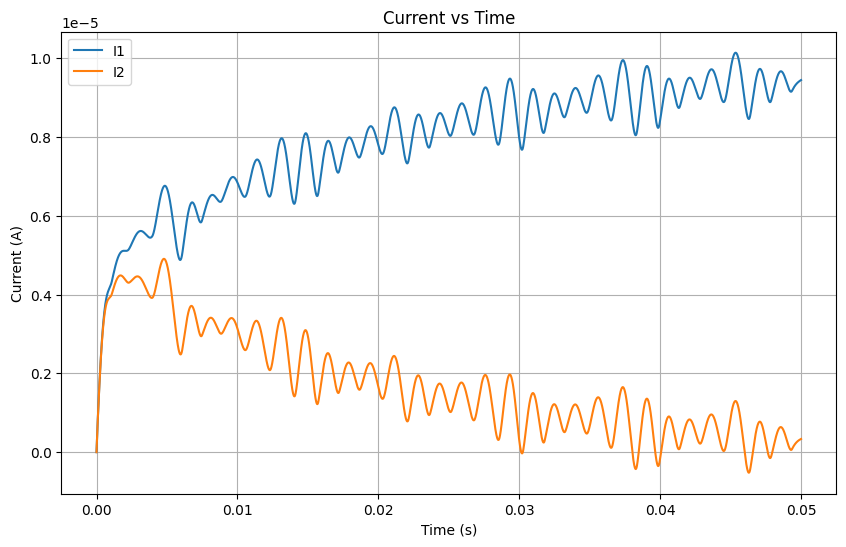

In [171]:
sol_rk45 = solve_ivp(system_of_odes, t_span, I0, t_eval=t_eval, method='RK45')

t = sol_rk45.t  # time points - could differ from the original t we defined since RK5 uses adaptive step size
I1, I2 = sol_rk45.y

# note: I label the axes with units, although I was not given the units. I assume the units are Amperes and seconds.
print("The solution is oscillating, which is characteristic for a stiff system.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, I1, label='I1')
plt.plot(t, I2, label='I2')
plt.title('Current vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()
plt.show()

#### Part B.2: Solve using Radau

Now the oscillations are gone and we have a smooth curve.


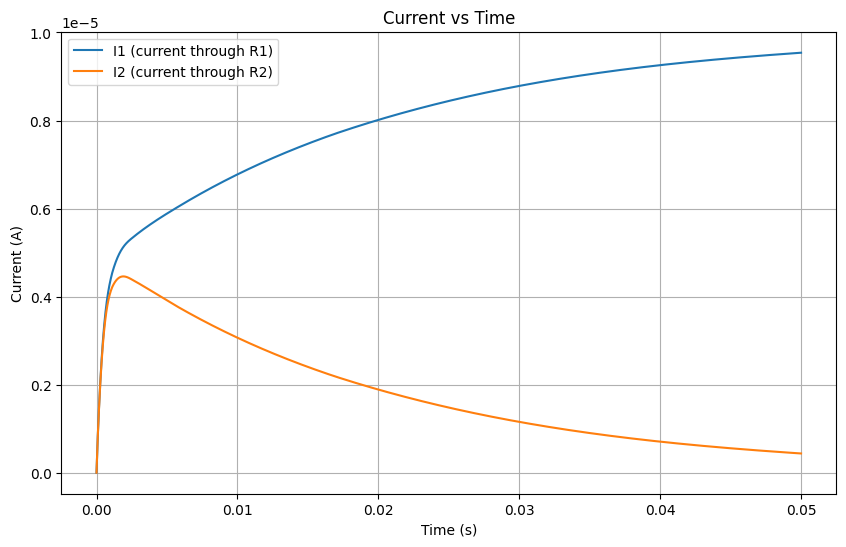

In [172]:
sol_radau = solve_ivp(system_of_odes, t_span, I0, t_eval=t_eval, method='Radau')

t = sol_radau.t
I1, I2 = sol_radau.y

# note: I label the axes with units, although I was not given the units. I assume the units are Amperes and seconds.
print("Now the oscillations are gone and we have a smooth curve.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, I1, label='I1 (current through R1)')
plt.plot(t, I2, label='I2 (current through R2)')
plt.title('Current vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()
plt.show()

#### Part C

In [173]:
h = 0.001

#### Part C.1: Explicit-Euler
$ \vec y_{i+1} = \vec y_i + h \cdot \mathbf{A} \cdot \vec y_{i} + h\cdot \vec b $  

The solution is oscillating, which is characteristic for a stiff system.


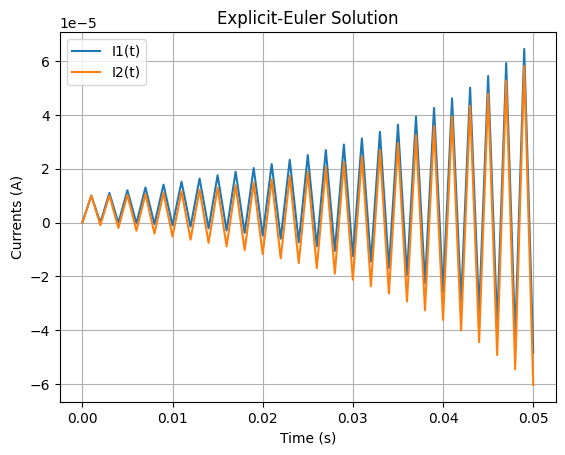

In [174]:
def explicit_euler_q2(A, b, I0, t, h):
    """
    Solves the system of ODEs using the Explicit Euler method with step size h.
    
    Parameters:
        A (np.ndarray): Coefficient matrix.
        b (np.ndarray): Constant vector.
        I0 (np.ndarray): Initial conditions for I.
        t (float): Time range [t0, tf].
        h (float): Step size.
        
    Returns:
        np.ndarray: Solution matrix, where each row corresponds to [I1, I2] at each time step.
        np.ndarray: Time points array.
    """
    num_steps = int((t[-1] - t[0]) / h) + 1
    t_points = np.linspace(t[0], t[-1], num_steps)
    I = np.zeros((num_steps, len(I0)))
    
    # Initial conditions
    I[0] = I0

    for i in range(1, num_steps):
        I[i] = I[i - 1] + h * (np.dot(A, I[i - 1]) + b)

    return I, t_points


# Solve the system
sol_explicit_euler_q2, t = explicit_euler_q2(A, b, I0, t, h)

# note: I label the axes with units, although I was not given the units. I assume the units are Amperes and seconds.
print("The solution is oscillating, which is characteristic for a stiff system.")

# Plot the solution
plt.plot(t, sol_explicit_euler_q2[:, 0], label="I1(t)")
plt.plot(t, sol_explicit_euler_q2[:, 1], label="I2(t)")
plt.xlabel("Time (s)")
plt.ylabel("Currents (A)")
plt.title("Explicit-Euler Solution")
plt.legend()
plt.grid()
plt.show()

#### Part C.2: Implicit Euler
$ \vec y_{i+1} = \vec y_i + h \cdot \mathbf{A} \cdot \vec y_{i+1} + h\cdot \vec b $  
$ \vec y_{i+1} - h \cdot \mathbf{A} \cdot \vec y_{i+1} = \vec y_i + h\cdot \vec b $  
$ (\mathbb{1} - h \cdot \mathbf{A}) \cdot \vec y_{i+1} = \vec y_i + h\cdot \vec b $  
$ \vec y_{i+1} = (\mathbb{1} - h \cdot \mathbf{A})^{-1} (\vec y_i + h \cdot b_i) $  
$ \text{As it states in the exercise sheet.} $

Now the oscillations are gone and we have a smooth curve.


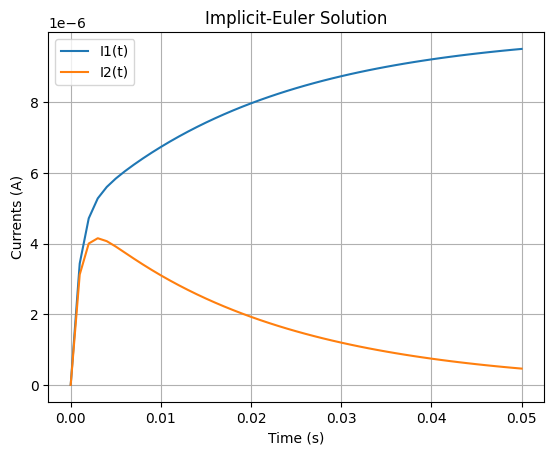

In [175]:
def implicit_euler_q2(A, b, I0, t, h):
    """
    Solves the system of ODEs using the Implicit Euler method with step size h.

    Parameters:
        A (np.ndarray): Coefficient matrix.
        b (np.ndarray): Constant vector.
        I0 (np.ndarray): Initial conditions for I.
        t (float): Time range [t0, tf].
        h (float): Step size.

    Returns:
        np.ndarray: Solution matrix, where each row corresponds to [I1, I2] at each time step.
        np.ndarray: Time points array.
    """
    num_steps = int((t[-1] - t[0]) / h) + 1
    t_points = np.linspace(t[0], t[-1], num_steps)
    I = np.zeros((num_steps, len(I0)))
    
    # Initial conditions
    I[0] = I0

    # Precompute (I - h*A)^(-1) for efficiency (won't change in the loop)
    inv_matrix = np.linalg.inv(np.eye(len(A)) - h * A)

    for i in range(1, num_steps):
        I[i] = np.dot(inv_matrix, I[i - 1] + h * b)

    return I, t_points


# Solve the system
sol_implicit_euler_q2, t = implicit_euler_q2(A, b, I0, t, h)

# note: I label the axes with units, although I was not given the units. I assume the units are Amperes and seconds.
print("Now the oscillations are gone and we have a smooth curve.")

# Plot the solution
plt.plot(t, sol_implicit_euler_q2[:, 0], label="I1(t)")
plt.plot(t, sol_implicit_euler_q2[:, 1], label="I2(t)")
plt.xlabel("Time (s)")
plt.ylabel("Currents (A)")
plt.title("Implicit-Euler Solution")
plt.legend()
plt.grid()
plt.show()